In [4]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# Field goal rate data. Each tuple contains (field goals made, field goals attempted).
player_field_goal_data = {
    # http://www.espn.com/nba/player/gamelog/_/id/2594922/year/2018/otto-porter-jr
    'Otto Porter Jr': [(0, 0), (4, 9), (4, 8), (3, 7), (5, 10), (4, 7), (0, 0), (5, 8), (4, 9)],
    # http://www.espn.com/nba/player/gamelog/_/id/3024/year/2018/jj-redick
    'JJ Redick': [(5, 13), (3, 11), (6, 15), (9, 17), (7, 13), (6, 13), (8, 18), (4, 9), (4, 13)],
    # http://www.espn.com/nba/player/gamelog/_/id/3213/year/2018/al-horford
    'Al Horford': [(7, 12), (2, 8), (4, 9), (5, 13), (2, 4), (5, 13), (8, 10), (7, 16), (4, 6)],
}

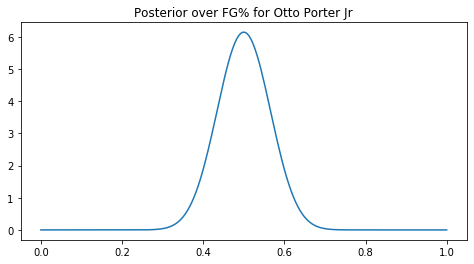

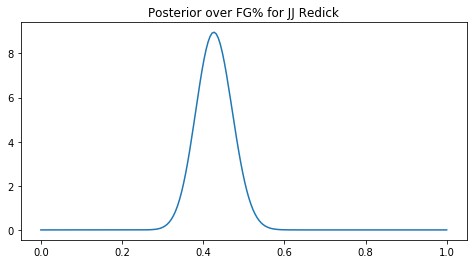

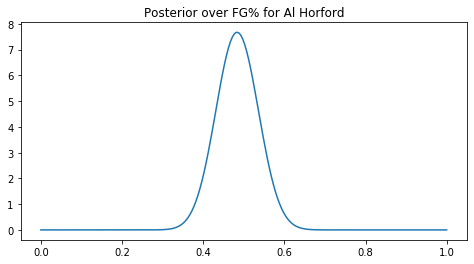

In [5]:
for player in player_field_goal_data.keys():

    # Prior: Beta distribution
    alpha_prior = 1
    beta_prior = 1
    prior_field_goal_rate = sts.beta(alpha_prior, beta_prior)

    # Likelihood: Binomial distribution
    total_successes = sum(game[0] for game in player_field_goal_data[player])
    total_failures = sum(game[1] - game[0] for game in player_field_goal_data[player])
    total_attempts = sum(game[1] for game in player_field_goal_data[player])

    # Posterior: Beta distribution
    alpha_post = alpha_prior + total_successes
    beta_post = beta_prior + total_failures
    posterior_field_goal_rate = sts.beta(alpha_post, beta_post)

    plt.figure(figsize=(8,4))
    plot_x = np.linspace(0, 1, 200)
    plot_y = posterior_field_goal_rate.pdf(plot_x)
    plt.plot(plot_x, plot_y)
    plt.title('Posterior over FG% for ' + player)

plt.show()

In [14]:
beta = np.random.beta(1,1, 100)
binomial = np.random.binomial(13, beta[1])

In [10]:
beta

array([0.63170145, 0.96786121, 0.78282678, 0.31915174, 0.48198734,
       0.53979698, 0.39412865, 0.92455287, 0.06225813, 0.62655137,
       0.26137392, 0.15639936, 0.82886186, 0.7508237 , 0.67640727,
       0.10692381, 0.31795673, 0.6297375 , 0.07532372, 0.38057026,
       0.51602061, 0.31052781, 0.57983389, 0.62497799, 0.4360892 ,
       0.20929651, 0.00408527, 0.45454385, 0.03448689, 0.49387821,
       0.37703487, 0.79385306, 0.93960845, 0.98071836, 0.33678706,
       0.64755697, 0.64701692, 0.37193608, 0.37207881, 0.07176287,
       0.20374546, 0.22069362, 0.91117961, 0.16409358, 0.36362892,
       0.35568551, 0.20250116, 0.25804223, 0.60753789, 0.52271833,
       0.05939422, 0.11745526, 0.79932459, 0.72519126, 0.65039249,
       0.21943855, 0.15569675, 0.47373473, 0.33948293, 0.06517156,
       0.7010097 , 0.98913423, 0.98674503, 0.77278524, 0.83703309,
       0.06256593, 0.4092963 , 0.82274739, 0.09968786, 0.9781464 ,
       0.74081359, 0.71112585, 0.60683232, 0.67814202, 0.93657

In [11]:
total_attempts = sum(game[1] for game in player_field_goal_data[player])

In [32]:
sample = []
for player in player_field_goal_data.keys():

    # Prior: Beta distribution
    alpha_prior = 1
    beta_prior = 1
    prior_field_goal_rate = beta = np.random.beta(alpha_prior,beta_prior)

    attempts = np.array(player_field_goal_data[player]).T[1]

    # Posterior: Beta distribution
    samples = prior_field_goal_rate*attempts
    sample.append(samples)
    '''
    plt.figure(figsize=(8,4))
    plot_x = np.linspace(0, 1, 200)
    plot_y = posterior_field_goal_rate.pdf(plot_x)
    plt.plot(plot_x, plot_y)
    plt.title('Posterior over FG% for ' + player)

plt.show()

'''

In [30]:
alpha_prior = 1
beta_prior = 1
prior_field_goal_rate = beta = np.random.beta(alpha_prior,beta_prior, 9)

attempts = np.array(player_field_goal_data[player]).T[1]

p = prior_field_goal_rate*attempts

In [33]:
sample

[array([0.        , 2.45851696, 2.18534841, 1.91217986, 2.73168552,
        1.91217986, 0.        , 2.18534841, 2.45851696]),
 array([0.45762602, 0.38722201, 0.52803002, 0.59843402, 0.45762602,
        0.45762602, 0.63363602, 0.31681801, 0.45762602]),
 array([ 8.57698315,  5.71798876,  6.43273736,  9.29173174,  2.85899438,
         9.29173174,  7.14748596, 11.43597753,  4.28849157])]

NameError: name 'samples_s' is not defined

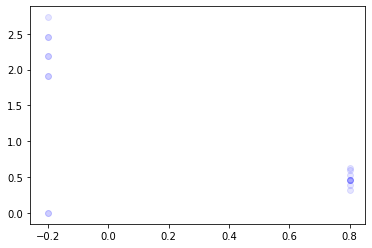

In [50]:
for i in range(2):
    plt.scatter(np.full(9, i-0.2),sample[i], alpha=0.1, color = "b")
#plt.scatter(np.full(1000, 3-0.2),samples_f[3], alpha=0.1, color = "b", label = "father")
plt.scatter(np.full(1000, 3+0.2),samples_s[3], alpha=0.1, color = "r", label = "son")

plt.ylim([0,1])
plt.xticks([0,1,2],["Otto","JJ","AL"])
plt.legend()
plt.title("Field Goal Made Samples")
plt.show()

In [55]:
a = sts.norm.rvs(1, 1)
a

0.7435790865818541